# SOK-1006 Mikro
## Seminar 1

### Oppgave 1

#### Deloppgave (b)
Tegn etterspørsel - se Espen sin Notebook 3 om matplotlib fra SOK-1003

In [2]:
# import pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [3]:
# definer symbolene som vi kommer til å bruke
x,a,b,A,B,p=sp.symbols('x a b A B p')

In [4]:
# Invers etterspørsel med pris p og kvantum x
# p=a/b - (1/b)*x

def demand(x, a, b):
    return a/b - (1/b)*x


(0.0, 60.0)

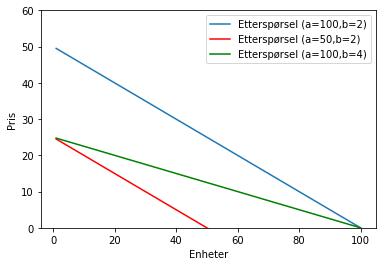

In [5]:
# tegn etterspørsel

# tegn 100 punkter 0-100
x = np.linspace(1,100,100)


fig,ax=plt.subplots()
ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')

# tegn etterspørsel for forskjellige verdier på a, b

ax.plot(x,demand(x, 100, 2),label='Etterspørsel (a=100,b=2)')
ax.plot(x,demand(x, 50, 2),color="red",label='Etterspørsel (a=50,b=2)')
ax.plot(x,demand(x, 100, 4),color="green",label='Etterspørsel (a=100,b=4)')

#legend:
ax.legend(loc='upper right')



plt.ylim((0,60))

Sammenlikner vi de blå od røde linjene: en økning i a fører til et parallelt skift utover i etterspørsel. En økning i inntekt for eksempel.
Se på den b lå og den grønne: en økning i b gir flatere etterspørsel. Kvantum er mer følsom for prisendringer. Muligens fordi en alternativ vare er blitt tilgjengelig (eller blitt billigere).

### deloppgave (d)

In [6]:
# Invers tilbud p=(1/B)*x+A/B
# La A=20, B=1
def supply(x, A, B):
    return (A/B)+(1/B)*x

(0.0, 100.0)

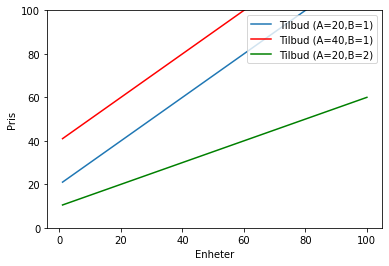

In [7]:
# tegn tilbud

# tegn 100 punkter 0-100
x = np.linspace(1,100,100)


fig,ax=plt.subplots()
ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')

# tegn tilbud for forskjellige verdier på Alfa, Beta

ax.plot(x,supply(x, 20, 1),label='Tilbud (A=20,B=1)')
ax.plot(x,supply(x, 40, 1),color="red",label='Tilbud (A=40,B=1)')
ax.plot(x,supply(x, 20, 2),color="green",label='Tilbud (A=20,B=2)')

#legend:
ax.legend(loc='upper right')



plt.ylim((0,100))

Blå/rød: en økning i A fører til et parallelt skift innover til venstre. Økte produksjonskostnader for eksempel.
Blå/grønn: en økning i B gir en flatere tilbudskurve. Flere produsenter i markedet for eksempel, eller teknologisk endring som gjør det lettere å produsere varen.

### deloppgave (e)

La oss illustrere likevekten ved å tegne et eksempel på tilbud og etterspørsel

(0.0, 60.0)

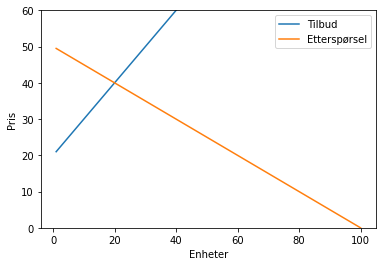

In [8]:
# a=100, b=2, A=20, B=1

# tegn 100 punkter 0-100
x = np.linspace(1,100,100)


# tegn tilbud
plt.plot(x,supply(x,20,1),label='Tilbud')

# og etterspørsel
plt.plot(x,demand(x,100,2),label='Etterspørsel')

#legend:
plt.legend(loc='upper right')

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

plt.ylim((0,60))

#### Løs for likevekten - Se Espen sin notebook 5 om Sympy fra SOK-1003

In [9]:
x,a,b,A,B,p=sp.symbols('x a b A B p')
eq_cond=sp.Eq(demand(x,a,b),supply(x,A,B))
eq_cond

Eq(a/b - x/b, A/B + x/B)

In [10]:
# likevektskvantum
x_eq=sp.solve(eq_cond,x)[0]
x_eq

(-A*b + B*a)/(B + b)

In [11]:
# likevektspris
p_eq=demand(x_eq,a,b)
print(f"""
Likevektspris er {sp.simplify (p_eq)}
Likevektskvantum er {x_eq}
""")


Likevektspris er (A + a)/(B + b)
Likevektskvantum er (-A*b + B*a)/(B + b)



#### deloppgave (f)
La oss først beregne hvordan likevektsprisen og -kvantum påvirkes av endringer i parametrene.

In [12]:
# Effekten av endring i a på likevektspris
diff_p_a=sp.diff(p_eq,a)
print(f"""
En økning i a gir denne effekten på likevektsprisen: {sp.simplify(diff_p_a)}

""")



En økning i a gir denne effekten på likevektsprisen: 1/(B + b)




In [13]:
# Effekten av endring i b på likevektspris
diff_p_b=sp.diff(p_eq,b)
print(f"""
En økning i b gir denne effekten på likevektsprisen: {sp.simplify(diff_p_b)}
""")



En økning i b gir denne effekten på likevektsprisen: -(A + a)/(B**2 + 2*B*b + b**2)



Merk at Sypmy ikke gir oss enklest form på den deriverte som er -(A + a)/(B + b)**2

In [36]:
# Effekten av endring i A på likevektspris
diff_p_A=sp.diff(p_eq,A)
print(f"""
En økning i A gir denne effekten på likevektsprisen: {sp.simplify(diff_p_A)}

""")


En økning i A gir denne effekten på likevektsprisen: 1/(B + b)




In [18]:
# Effekten av endring i B på likevektspris
diff_p_B=sp.diff(p_eq,B)
print(f"""
En økning i B gir denne effekten på likevektsprisen: {sp.simplify(diff_p_B)}

""")


En økning i a gir denne effekten på likevektsprisen: -(A + a)/(B**2 + 2*B*b + b**2)




#### Figurer

(0.0, 100.0)

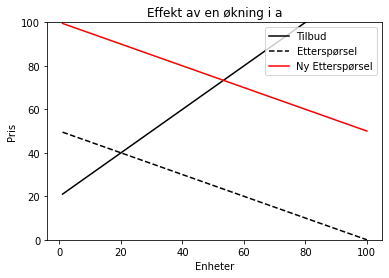

In [31]:
# Vi tegner eksempelet ovenfor, og endrer én parameter 

# Øk a til a=200, alt ellers likt

# a=200, b=2, A=20, B=1

# tegn 100 punkter 0-100
x = np.linspace(1,100,100)

# tegn opprinnelig tilbud og etterspørsel i sort
plt.plot(x,supply(x,20,1),color='black',label='Tilbud')

plt.plot(x,demand(x,100,2),color='black',linestyle='dashed',label='Etterspørsel')



# og ny etterspørsel (rødt)
plt.plot(x,demand(x,200,2),color='red',label='Ny Etterspørsel')

#legend:
plt.legend(loc='upper right')

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

# tittel
plt.title("Effekt av en økning i a")

plt.ylim((0,100))

(0.0, 60.0)

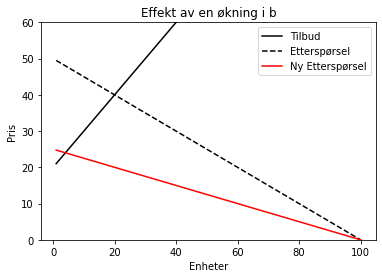

In [32]:
# Øk b til b =4, alt ellers likt

# a=200, b=2, A=20, B=1

# tegn 100 punkter 0-100
x = np.linspace(1,100,100)

# tegn opprinnelig tilbud og etterspørsel i sort
plt.plot(x,supply(x,20,1),color='black',label='Tilbud')

plt.plot(x,demand(x,100,2),color='black',linestyle='dashed',label='Etterspørsel')



# og ny etterspørsel (rødt)
plt.plot(x,demand(x,100,4),color='red',label='Ny Etterspørsel')

#legend:
plt.legend(loc='upper right')

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

# tittel
plt.title("Effekt av en økning i b")

plt.ylim((0,60))

(0.0, 60.0)

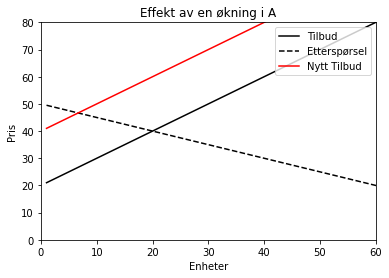

In [34]:
# Øk A til A=40, alt ellers likt

# a=100, b=2, A=40, B=1

# tegn 100 punkter 0-100
x = np.linspace(1,100,100)

# tegn opprinnelig tilbud og etterspørsel i sort
plt.plot(x,supply(x,20,1),color='black',label='Tilbud')

plt.plot(x,demand(x,100,2),color='black',linestyle='dashed',label='Etterspørsel')



# og nytt tilbud (rødt)
plt.plot(x,supply(x,40,1),color='red',label='Nytt Tilbud')


#legend:
plt.legend(loc='upper right')

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

# tittel
plt.title("Effekt av en økning i A")

plt.ylim((0,80))
plt.xlim((0,60))

(0.0, 60.0)

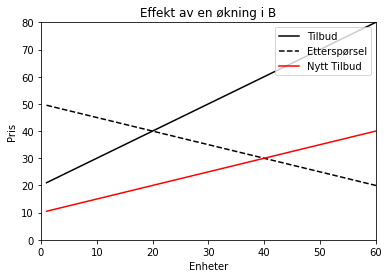

In [35]:
# Øk B til B=2, alt ellers likt

# a=100, b=2, A=20, B=2

# tegn 100 punkter 0-100
x = np.linspace(1,100,100)

# tegn opprinnelig tilbud og etterspørsel i sort
plt.plot(x,supply(x,20,1),color='black',label='Tilbud')

plt.plot(x,demand(x,100,2),color='black',linestyle='dashed',label='Etterspørsel')



# og nytt tilbud (rødt)
plt.plot(x,supply(x,20,2),color='red',label='Nytt Tilbud')


#legend:
plt.legend(loc='upper right')

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

# tittel
plt.title("Effekt av en økning i B")

plt.ylim((0,80))
plt.xlim((0,60))
